# Computational Intelligence Homework 1 

In [1]:
import sys
!python -m pip install tabulate

In [2]:
from tabulate import tabulate
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import random
import math

## fetching data

the problem is that the data in Open, Close, High, Low is not float, and string instead. Hence, we have to change the data type to float (assuming we count cents as well). But there is a minor problem which the data in those columns has ',' character, so in this cell I tried to remove them by iterating the dataframe in those columns. (the apply function was tried, But didn't work)

In [3]:
data = pd.read_csv('../BTC-USDT.csv')
print(tabulate(data, headers = 'keys', tablefmt = 'fancy_grid'))
N = len(data.index) # sample size
col_num = len(data.columns)
data.insert(0, 'x', data.index)

# an iteration of the dataframe from open column to close, to remove the ',' character from the numbers in string type.
for i in range(0, N):
    for j in range(2, col_num+1):
        data.iloc[i, j] = data.iloc[i,j].replace(",","")
        

# change data type from string to float    
data[['Open', 'High', 'Low', 'Close']] = data[['Open', 'High', 'Low', 'Close']].astype(float)

# all vertical vectors
y_Low = np.matrix(data['Low'].to_numpy()).T
y_High = np.matrix(data['High'].to_numpy()).T
y_Open = np.matrix(data['Open'].to_numpy()).T
y_Close = np.matrix(data['Close'].to_numpy()).T
x = np.matrix(data['x'].to_numpy()).T
# add ones to x for the bias. it'll be a general structure.
x = np.hstack([x, np.ones((N,1), dtype=float)])

╒═════╤════════════╤════════╤════════╤════════╤═════════╕
│     │ Date       │ Open   │ High   │ Low    │ Close   │
╞═════╪════════════╪════════╪════════╪════════╪═════════╡
│   0 │ 10/4/2020  │ 10,580 │ 10,700 │ 10,536 │ 10,652  │
├─────┼────────────┼────────┼────────┼────────┼─────────┤
│   1 │ 10/5/2020  │ 10,652 │ 10,754 │ 10,635 │ 10,741  │
├─────┼────────────┼────────┼────────┼────────┼─────────┤
│   2 │ 10/6/2020  │ 10,740 │ 10,797 │ 10,544 │ 10,557  │
├─────┼────────────┼────────┼────────┼────────┼─────────┤
│   3 │ 10/7/2020  │ 10,557 │ 10,678 │ 10,546 │ 10,660  │
├─────┼────────────┼────────┼────────┼────────┼─────────┤
│   4 │ 10/8/2020  │ 10,662 │ 10,945 │ 10,558 │ 10,894  │
├─────┼────────────┼────────┼────────┼────────┼─────────┤
│   5 │ 10/9/2020  │ 10,894 │ 11,099 │ 10,848 │ 11,042  │
├─────┼────────────┼────────┼────────┼────────┼─────────┤
│   6 │ 10/10/2020 │ 11,041 │ 11,464 │ 11,029 │ 11,371  │
├─────┼────────────┼────────┼────────┼────────┼─────────┤
│   7 │ 10/11/

## Linear model for estimating Bitcoin fluctuation behavior

### direct solving method

direct solution is as follows:

$$
\begin{align*}
&\vec{\nabla}_w\mathcal{E} = \mathbf{X}\vec{w} - \vec{t} \\
&\vec{\nabla}_w\mathcal{E} = 0 \\
&\mathbf{X}\vec{w} - \vec{t} = 0 \\
&\mathbf{X}\vec{w} = \vec{t} \\
&\mathbf{X}^T\mathbf{X}\vec{w} = \mathbf{X}^T\;\vec{t} \\
&\vec{w} = \Big(\mathbf{X}^T\mathbf{X}\Big)^{-1}\mathbf{X}^T\;\vec{t} \\
\end{align*}
$$

In [4]:
w_Low_dir = np.dot(np.dot(x.T, x)**-1, np.dot(x.T,y_Low))
w_High_dir = np.dot(np.dot(x.T, x)**-1, np.dot(x.T,y_High))
w_Close_dir = np.dot(np.dot(x.T, x)**-1, np.dot(x.T,y_Close))
w_Open_dir = np.dot(np.dot(x.T, x)**-1, np.dot(x.T,y_Open))

### Linear regression

to get the regression line, we have to calculate the matrix multiplication of $ \mathbf{X}\,\vec{w} $. from that we get an array of all estimated y values (bitcoin prices in each day of index).

Text(0.5, 1.0, 'close price')

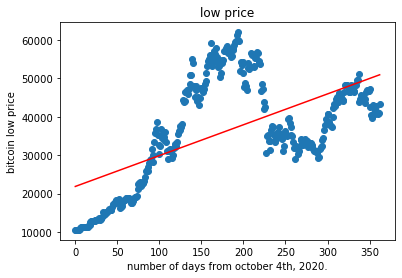

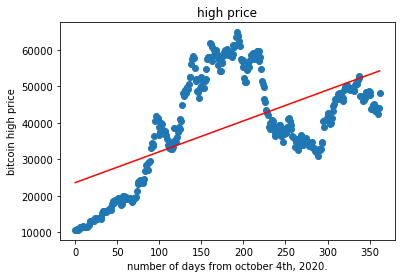

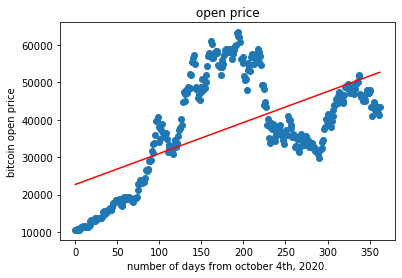

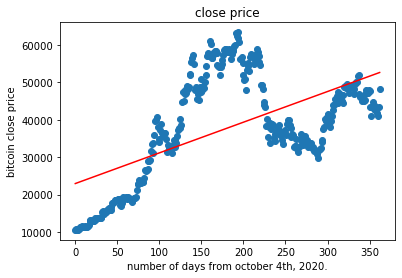

In [5]:
plt.figure()
plt.scatter(np.array(x[:,0]), np.array(y_Low))
estimate_Low = np.dot(x, w_Low_dir)
plt.plot(np.array(x[:,0]), np.array(estimate_Low), color='r')
plt.ylabel('bitcoin low price')
plt.xlabel('number of days from october 4th, 2020.')
plt.title('low price')

plt.figure()
plt.scatter(np.array(x[:,0]), np.array(y_High))
estimate_High = np.dot(x, w_High_dir)
plt.plot(np.array(x[:,0]), np.array(estimate_High), color='r')
plt.ylabel('bitcoin high price')
plt.xlabel('number of days from october 4th, 2020.')
plt.title('high price')

plt.figure()
plt.scatter(np.array(x[:,0]), np.array(y_Open))
estimate_Open = np.dot(x, w_Open_dir)
plt.plot(np.array(x[:,0]), np.array(estimate_Open), color='r')
plt.ylabel('bitcoin open price')
plt.xlabel('number of days from october 4th, 2020.')
plt.title('open price')

plt.figure()
plt.scatter(np.array(x[:,0]), np.array(y_Close))
estimate_Close = np.dot(x, w_Close_dir)
plt.plot(np.array(x[:,0]), np.array(estimate_Close), color='r')
plt.ylabel('bitcoin close price')
plt.xlabel('number of days from october 4th, 2020.')
plt.title('close price')

### solving with gradient descent (an iterative approach)

In [6]:
w_Low = np.matrix([0.0]*2).T      # D+1, D features and one bias.
w_High = np.matrix([0.0]*2).T
w_Open = np.matrix([0.0]*2).T 
w_Close = np.matrix([0.0]*2).T
learning_rate = [0.00001, 0.01]
No_iterations = 2000 # number of iterations

### estimating a low price line with gradient descent

final calculated weights after 2000 iterations =
[[   80.98127975]
 [21712.63543024]]
----------------------------------------------------
cost equals to: 62096691.65736364


Text(0.5, 1.0, 'low price')

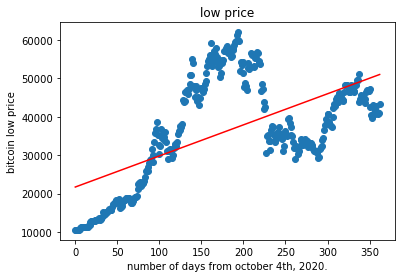

In [7]:
for itr in range(No_iterations):
    for j in range(w_Low.shape[0]):
        cost_function_grad = (1/N)*np.dot((np.dot(x, w_Low) - y_Low).T, x[:,j])
        w_Low[j] = w_Low[j] - learning_rate[j] * cost_function_grad

print('final calculated weights after',itr+1, 'iterations =')
print(w_Low)
print('----------------------------------------------------')
estimate = np.dot(x, w_Low)
cost_function = np.sum(np.power(estimate - y_Low, 2))/(2*N)
print('cost equals to:',cost_function)            
plt.figure()
plt.scatter(np.array(x[:,0]), np.array(y_Low))

plt.plot(np.array(x[:,0]), np.array(estimate), color='r')
plt.ylabel('bitcoin low price')
plt.xlabel('number of days from october 4th, 2020.')
plt.title('low price')

### estimating a high price line with gradient descent

final calculated weights after 2000 iterations =
[[   85.18781823]
 [23469.29621877]]
----------------------------------------------------
cost equals to: 70833933.51566216


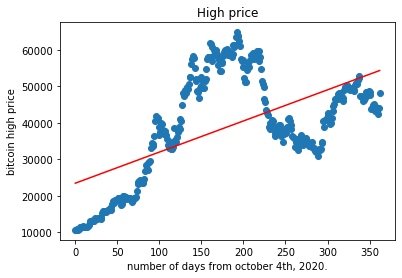

In [8]:
for itr in range(No_iterations):
    for j in range(w_High.shape[0]):
        cost_function_grad = (1/N)*np.dot((np.dot(x, w_High) - y_High).T, x[:,j])
        w_High[j] = w_High[j] - learning_rate[j] * cost_function_grad
print('final calculated weights after',itr+1, 'iterations =')
print(w_High)
print('----------------------------------------------------')
estimate = np.dot(x, w_High)
cost_function = np.sum(np.power(estimate - y_High, 2))/(2*N)
print('cost equals to:',cost_function)            
plt.figure()
plt.scatter(np.array(x[:,0]), np.array(y_High))

plt.plot(np.array(x[:,0]), np.array(estimate), color='r')
plt.ylabel('bitcoin high price')
plt.xlabel('number of days from october 4th, 2020.')
plt.title('High price')
plt.show()

### estimating an open price line with gradient descent

final calculated weights after 2000 iterations =
[[   83.43909516]
 [22549.81448322]]
----------------------------------------------------
cost equals to: 66968620.895163596


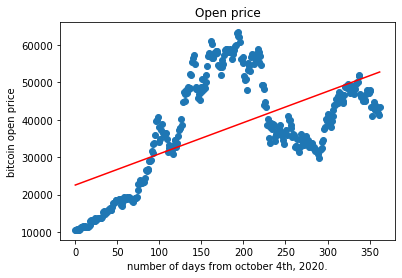

In [9]:
for itr in range(No_iterations):
    for j in range(w_Open.shape[0]):
        cost_function_grad = (1/N)*np.dot((np.dot(x, w_Open) - y_Open).T, x[:,j])
        w_Open[j] = w_Open[j] - learning_rate[j] * cost_function_grad
print('final calculated weights after',itr+1, 'iterations =')
print(w_Open)
print('----------------------------------------------------')
estimate = np.dot(x, w_Open)
cost_function = np.sum(np.power(estimate - y_Open, 2))/(2*N)
print('cost equals to:',cost_function)            
plt.figure()
plt.scatter(np.array(x[:,0]), np.array(y_Open))

plt.plot(np.array(x[:,0]), np.array(estimate), color='r')
plt.ylabel('bitcoin open price')
plt.xlabel('number of days from october 4th, 2020.')
plt.title('Open price')
plt.show()

### estimating a close price line with gradient descent

final calculated weights after 2000 iterations =
[[   82.62708104]
 [22793.26055716]]
----------------------------------------------------
cost equals to: 66809053.22994859


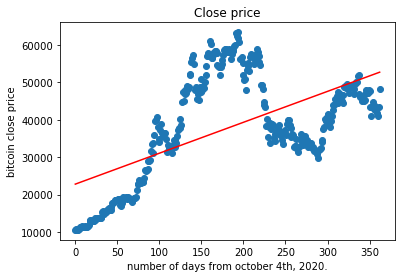

In [10]:
for itr in range(No_iterations):
    for j in range(w_Close.shape[0]):
        cost_function_grad = (1/N)*np.dot((np.dot(x, w_Close) - y_Close).T, x[:,j])
        w_Close[j] = w_Close[j] - learning_rate[j] * cost_function_grad
print('final calculated weights after',itr+1, 'iterations =')
print(w_Close)
print('----------------------------------------------------')
estimate = np.dot(x, w_Close)
cost_function = np.sum(np.power(estimate - y_Close, 2))/(2*N)
print('cost equals to:',cost_function)            
plt.figure()
plt.scatter(np.array(x[:,0]), np.array(y_Close))

plt.plot(np.array(x[:,0]), np.array(estimate), color='r')
plt.ylabel('bitcoin close price')
plt.xlabel('number of days from october 4th, 2020.')
plt.title('Close price')
plt.show()

## polynomial regression for estimating bitcoin fluctuation behavior

### reformat data
first of all we separate our data to three disjoint sets to evaluate our algorithm and avoid overfitting. for this matter we separate them into three training, validation and test set, the vector size for each set is 70%, 15%, 15% in order. separation code is as below,

In [11]:
x = np.matrix(data['x'].to_numpy()).T # reset data from the previous problem.
y_Open = np.matrix(data['Open'].to_numpy()).T # reset data from the previous problem.
data_len = x.shape[0]
separation_ratio = [0.7, 0.15, 0.15]

test_set = np.matrix([0.0]*math.floor(separation_ratio[2]*data_len)).T
validation_set = np.matrix([0.0]*math.floor(separation_ratio[1]*data_len)).T
training_set = np.matrix([0.0]*math.ceil(separation_ratio[0]*data_len)).T

In [12]:
# sample from data for each set:
x_aslist = x.T.tolist()[0] # used in sampling function below
y_aslist = y_Open.T.tolist()[0]
visit_vec = np.matrix([False]*data_len).T

### initialize test set:

In [13]:
test_set = random.sample(x_aslist, k=test_set.shape[0])
test_set.sort()

# update visit vector. 
visit_vec_test = np.matrix([pivot in test_set for pivot in x_aslist]).T 
# [x in A for x in B] checks for every element in list A if available in list B and returns the answer in a list.
visit_vec = np.logical_or(visit_vec, visit_vec_test)

# excluding test data from the initial data. nparray reinitialization was necessary for some reason.
new_data_space = x[np.logical_not(visit_vec)].T
new_data_space_aslist = np.array(new_data_space.T)[0].tolist() 

new_data_label = y_Open[np.logical_not(visit_vec)].T
new_data_label_aslist = np.array(new_data_label.T)[0].tolist() 

test_set = np.matrix(test_set).T
y_test_set = y_Open[visit_vec_test].T

we won't use our test set data for learning algorithm but only to announce the error in learned model.

### initialize validation set:

In [14]:
validation_set = random.sample(new_data_space_aslist, k=validation_set.shape[0])
validation_set.sort()
# update visit vector. 
visit_vec_validat = np.matrix([pivot in validation_set for pivot in x_aslist]).T 
# [x in A for x in B] checks for every element in list A if available in list B and returns the answer in a list.
visit_vec = np.logical_or(visit_vec, visit_vec_validat)

# excluding validation data from the test set excluded data. nparray reinitialization was necessary for some reason.
new_data_space = x[np.logical_not(visit_vec)].T
new_data_space_aslist = np.array(new_data_space.T)[0].tolist() 

new_data_label = y_Open[np.logical_not(visit_vec)].T
new_data_label_aslist = np.array(new_data_label.T)[0].tolist() 

validation_set = np.matrix(validation_set).T
y_validation_set = y_Open[visit_vec_validat].T

### initialize training set:

In [15]:
training_set_input = new_data_space
training_set_label = new_data_label

## polynomial regression

for this section we use a degree variable as to how complex our model should be. (as equation below):
$$
y = \sum_{j\,=\,0}^{degree} w_j\,x^j
$$

------------------------------------------ degree: 2
[2.e-10 1.e-05 1.e-02]
final calculated weights after 20000 iterations =
[[-8.16926705e-01]
 [ 3.74760146e+02]
 [ 5.11580267e+03]]
----------------------------------------------------
error equals to: [[-2.58388401e-07]]


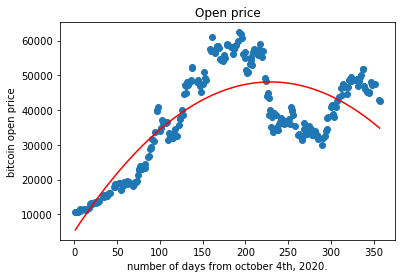

------------------------------------------ degree: 3
[4.e-15 2.e-10 1.e-05 1.e-02]
final calculated weights after 20000 iterations =
[[ 3.20563482e-03]
 [-2.51995136e+00]
 [ 6.15992468e+02]
 [-1.94963771e+03]]
----------------------------------------------------
error equals to: [[0.90161768]]


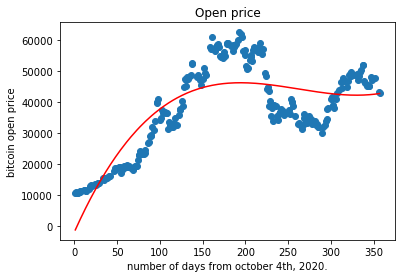

------------------------------------------ degree: 4
[8.e-20 4.e-15 2.e-10 1.e-05 1.e-02]
final calculated weights after 20000 iterations =
[[ 4.93703238e-05]
 [-3.11303075e-02]
 [ 5.07246412e+00]
 [ 4.99150135e+01]
 [ 6.81916601e+03]]
----------------------------------------------------
error equals to: [[-25.97104528]]


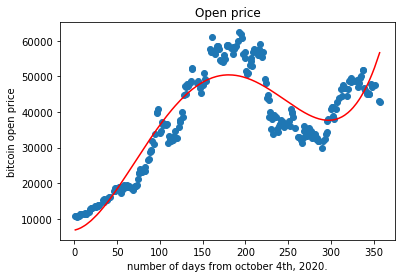

------------------------------------------ degree: 5
[1.6e-24 8.0e-20 4.0e-15 2.0e-10 1.0e-05 1.0e-02]
final calculated weights after 20000 iterations =
[[ 2.19961554e-07]
 [-1.27674560e-04]
 [ 1.71720260e-02]
 [ 4.19678163e-02]
 [ 1.98007266e+02]
 [ 7.33314826e+03]]
----------------------------------------------------
error equals to: [[-3.87416129]]


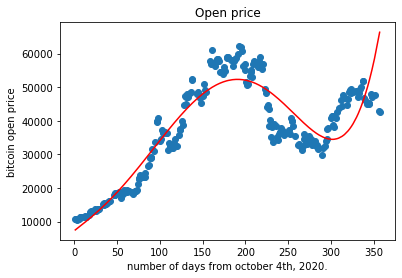

------------------------------------------ degree: 6
[2.24e-30 1.60e-24 8.00e-20 4.00e-15 2.00e-10 1.00e-05 1.00e-02]
final calculated weights after 20000 iterations =
[[-6.32646727e-10]
 [ 1.23975434e-06]
 [-6.35958097e-04]
 [ 1.13741066e-01]
 [-5.10980969e+00]
 [-7.36984159e+00]
 [ 1.71917544e+04]]
----------------------------------------------------
error equals to: [[-118.9330785]]


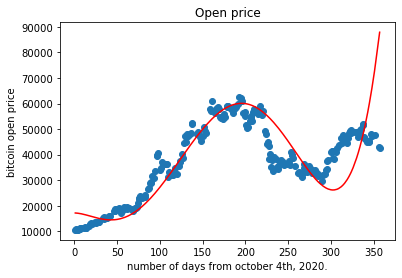

------------------------------------------ degree: 7
[[-87.49650713]]
[5.376e-35 2.240e-30 1.600e-24 8.000e-20 4.000e-15 2.000e-10 1.000e-05
 1.000e-02]
final calculated weights after 20000 iterations =
[[-5.13024240e-12]
 [ 1.53347734e-09]
 [ 2.01453145e-06]
 [-1.17516911e-03]
 [ 2.04570269e-01]
 [-9.69712393e+00]
 [-3.32571405e+01]
 [ 1.96704827e+04]]
----------------------------------------------------
error equals to: [[-87.49650713]]


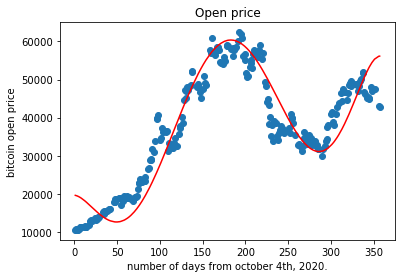

------------------------------------------ degree: 8
[1.0752e-39 5.3760e-35 2.2400e-30 1.6000e-24 8.0000e-20 4.0000e-15
 2.0000e-10 1.0000e-05 1.0000e-02]
final calculated weights after 20000 iterations =
[[-6.12738263e-15]
 [ 5.75942173e-12]
 [-5.66308886e-10]
 [-9.92273650e-07]
 [ 4.51344656e-04]
 [-8.72044315e-02]
 [ 7.41277904e+00]
 [ 9.86453682e+01]
 [ 4.73989364e+03]]
----------------------------------------------------
error equals to: [[-11.19385834]]


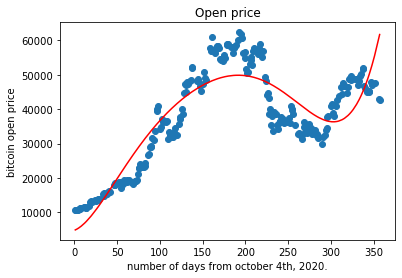

------------------------------------------ degree: 9
[2.1504e-44 1.0752e-39 5.3760e-35 2.2400e-30 1.6000e-24 8.0000e-20
 4.0000e-15 2.0000e-10 1.0000e-05 1.0000e-02]
final calculated weights after 20000 iterations =
[[ 1.96208784e+20]
 [-2.76502908e+23]
 [ 1.16500803e+26]
 [-1.21041240e+28]
 [-8.89006720e+30]
 [ 5.06114374e+33]
 [-9.59482027e+35]
 [ 3.73988969e+37]
 [ 3.29447425e+39]
 [-2.87195460e+40]]
----------------------------------------------------
error equals to: [[1.2330562e+40]]


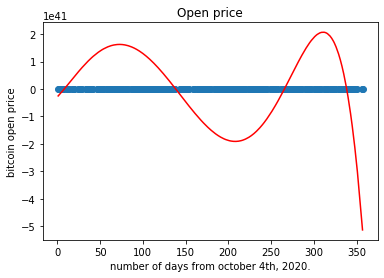

In [30]:
training_set_input = new_data_space
new_N = training_set_input.shape[0]
No_iterations = 20000 # number of iterations

learning_rate = np.array([0.00001, 0.01])
training_set_input = np.hstack([training_set_input, np.ones(training_set_input.shape, dtype=float)])
dyn_valid_set = np.hstack([validation_set, np.ones(validation_set.shape, dtype=float)]) 
# dynamic validation set which changes with the change in polynomial model degree. but validation will remain the same with each runtime.
for degree in range(2,10) : # the desired model might need less than 10 degrees so we proceed with 10 degrees iteration.
    
    # reinitialize model for each degree.
    w = np.matrix([0.0]*(degree+1)).T # this has to be a vector
    powered_vec = np.power(training_set_input[:,-2],degree)
    training_set_input = np.hstack([powered_vec,training_set_input])
    learning_rate = np.hstack([learning_rate[0]*0.00002,learning_rate])
    if(degree==6):
        learning_rate[0] = 0.07*learning_rate[0]
    if(degree==7):
        learning_rate[0] = 1.2*learning_rate[0]
#     if(degree==9):
#         learning_rate[0] = 0.5*learning_rate[0]
    
    print('------------------------------------------ degree:', degree)
    for itr in range(No_iterations):
        for j in range(w.shape[0]):
            cost_function_grad = (1/new_N)*np.dot((np.dot(training_set_input, w) - training_set_label).T, training_set_input[:,j])
            w[j] = w[j] - learning_rate[j] * cost_function_grad
#         print(cost_function_grad)       
            
        
    estimate = np.dot(training_set_input, w)
    cost_function = np.sum(np.power(estimate - training_set_label, 2))/(2*new_N)
    if(degree==7):
        print(cost_function_grad)
    # training set learning
    print(learning_rate)
    print('final calculated weights after',itr+1, 'iterations =')
    print(w)
    print('----------------------------------------------------')
    print('error equals to:',cost_function_grad)            
    plt.figure()
    plt.scatter(np.array(training_set_input[:,-2]), np.array(training_set_label))
    poly_estimate = np.dot(training_set_input, w)
    plt.plot(np.array(training_set_input[:,-2]), np.array(poly_estimate), color='r')
    plt.ylabel('bitcoin open price')
    plt.xlabel('number of days from october 4th, 2020.')
    plt.title('Open price')
    plt.show()
    

    # validation set checking
    current_error = 
    if(previous_error >= current_error):
        previous_error = current_error
        # continue the loop
    else:
        # don't continue and the previous degree model weights should be output.
        break

In [19]:
# how to normalize data
set_mean = np.mean(np.power(training_set, 2))
set_std = np.std(np.power(training_set,2))

new_set = (np.power(training_set,2) - set_mean)/set_std
# normalized data

d:\apps\python3.7.5\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
